In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [3]:
data = pd.read_csv("student-mat.csv", sep = ";")
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

In [4]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)

print(accuracy)
print('coefficient: \n', linear.coef_)
print('intercept: \n', linear.intercept_)

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)
print(accuracy)
print('coefficient: \n', linear.coef_)
print('intercept: \n', linear.intercept_)

with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)
    
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])
    

0.7579830333957809
coefficient: 
 [ 0.1348629   0.98416756 -0.20139634 -0.29482557  0.03102533]
intercept: 
 -1.2316313677635424
0.7579830333957809
coefficient: 
 [ 0.1348629   0.98416756 -0.20139634 -0.29482557  0.03102533]
intercept: 
 -1.2316313677635424
7.317819624726868 [8 8 2 0 0] 0
8.623002070690742 [9 9 2 0 6] 10
8.49441796804071 [10  9  3  0  4] 9
8.432367305847444 [10  9  3  0  2] 9
9.261054969296689 [10 10  2  1  0] 0
15.21308350260871 [15 15  2  0  2] 16
10.742887223639384 [13 11  2  1  3] 11
10.991443112029762 [13 11  3  0  8] 11
17.579728524026912 [16 17  1  0  4] 18
3.7073363403034154 [6 5 1 2 0] 0
13.88189512548567 [13 14  3  0  6] 14
14.357500046709019 [14 14  1  0  4] 14
11.006687466741099 [13 11  2  0  2] 11
5.697377992355166 [8 7 2 3 8] 8
15.798941156839687 [14 16  3  0  0] 16
12.634280563451554 [13 13  4  0  4] 12
13.21246365616577 [12 13  2  0 14] 12
9.690743444329392 [11 10  2  0  0] 10
10.348200955925666 [13 10  2  1 22] 11
9.632099544209408 [ 7 10  2  1 25] 11


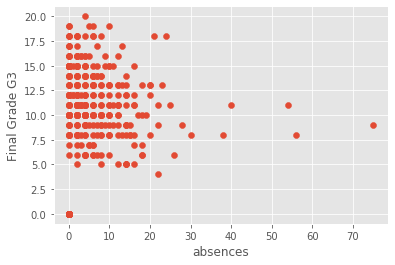

In [6]:
p = 'absences'
style.use("ggplot")
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade G3")
plt.show()